In [1]:
import or_gym
import gym
from gym import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env_name = 'InvManagement-v2'
env = or_gym.make(env_name)

env.step(env.action_space.sample())

(array([   0.,   79.,    0.,    0., 1158., 1785., 3923.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 -375.5,
 False,
 {})

In [31]:
env.period = 0
demand = np.hstack([env.D[d].iloc[env.period] for d in env.retail_links])
print(demand, demand.shape)
inventory = np.hstack([env.X[n].iloc[env.period] for n in env.main_nodes])
print(inventory, inventory.shape)
if env.period == 0:
    _pipeline = [[env.Y[k].iloc[0]] for k, v in env.lead_times.items()]
else:
    _pipeline = [env.Y[k].iloc[max(env.period-v, 0):env.period].values for k, v in env.lead_times.items()]
# print(pipeline, pipeline.shape)
print(_pipeline)

[21.] (1,)
[ 100.  100.   80.  200.  150. 1000.] (6,)
[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]


In [32]:
# Ensure pipeline has sufficient values for dimensions
pipeline = []
for p, v in zip(_pipeline, env.lead_times.values()):
    if v == 0:
        continue
    if len(p) < v:
        pipe = np.zeros(v)
        pipe[-len(p):] += p
    pipeline.append(pipe)
pipeline

[array([0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [33]:
[v == len(p) for p, v in zip(pipeline, env.lead_times.values())]

[True, True, True, True, True, True, True]

In [34]:
pipeline = np.hstack(pipeline)
pipeline.shape

(52,)

In [27]:
env.Y

Source        2    3     4           5     6          7          
Receiver      1    1     2     3     3     2     3    4    5    6
0           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
1         100.0  0.0  90.0  90.0  90.0  80.0  80.0  0.0  0.0  0.0
2           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
3           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
4           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
5           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
6           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
7           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
8           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
9           0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
10          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
11          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
12          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
13          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
14          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
15          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
16          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
17          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
18          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
19          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
20          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
21          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
22          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
23          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
24          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
25          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
26          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
27          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
28          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
29          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0
30          0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0

In [39]:
pipe

array([0., 0., 3.])

In [3]:
def plot_network(env):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    adjacency_matrix = np.vstack(env.graph.edges())
    # Set node levels
    levels = {}
    # levels['market'] = np.array([0])
    levels['retailer'] = np.array([1])
    levels['distributor'] = np.unique(np.hstack(
        [list(env.graph.predecessors(i)) for i in levels['retailer']]))
    levels['manufacturer'] = np.unique(np.hstack(
        [list(env.graph.predecessors(i)) for i in levels['distributor']]))
    levels['raw_materials'] = np.unique(np.hstack(
        [list(env.graph.predecessors(i)) for i in levels['manufacturer']]))

    level_col = {'retailer': 0,
                 'distributor': 1,
                 'manufacturer': 2,
                 'raw_materials': 3}

    max_density = np.max([len(v) for v in levels.values()])
    node_coords = {}
    node_num = 1
    plt.figure(figsize=(12,8))
    for i, (level, nodes) in enumerate(levels.items()):
        n = len(nodes)
        node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
        node_y = np.atleast_1d(node_y)
        plt.scatter(np.repeat(i, n), node_y, label=level, s=50)
        for y in node_y:
            plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
            node_coords[node_num] = (i, y)
            node_num += 1

    # Draw edges
    for node_num, v in node_coords.items():
        x, y = v
        sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
        for s in sinks:
            try:
                sink_coord = node_coords[s]
            except KeyError:
                continue
            for k, n in levels.items():
                if node_num in n:
                    color = colors[level_col[k]]
            x_ = np.hstack([x, sink_coord[0]])
            y_ = np.hstack([y, sink_coord[1]])
            plt.plot(x_, y_, color=color)

    plt.ylabel('Node')
    plt.yticks([0], [''])
    plt.xlabel('Level')
    plt.xticks(np.arange(len(levels)), [k for k in levels.keys()])
    plt.show()

# Build RL Model

In [4]:
import ray
from ray import tune
from ray.rllib import agents
ray.init(ignore_reinit_error=True)

2020-09-24 18:34:39,068	INFO resource_spec.py:212 -- Starting Ray with 0.63 GiB memory available for workers and up to 0.32 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-24 18:34:41,246	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.0.8',
 'raylet_ip_address': '192.168.0.8',
 'redis_address': '192.168.0.8:6379',
 'object_store_address': '/tmp/ray/session_2020-09-24_18-34-39_032870_6335/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-09-24_18-34-39_032870_6335/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-09-24_18-34-39_032870_6335'}

In [5]:
env_config = {}
tune.register_env(env_name, 
    lambda env_name: env(env_name, env_config=env_config))

In [6]:
rl_config = {'num_workers': 1}
trainer = agents.ppo.PPOTrainer(rl_config, env=or_gym.utils.create_env(env_name))

2020-09-24 18:34:45,417	INFO trainer.py:585 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2020-09-24 18:34:45,423	INFO trainer.py:612 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=raylet) E0924 18:34:41.830621300    6578 socket_utils_common_posix.cc:208] check for SO_REUSEPORT: {"created":"@1600990481.830599900","description":"Protocol not available","errno":92,"file":"external/com_github_grpc_grpc/src/core/lib/iomgr/socket_utils_common_posix.cc","file_line":185,"os_error":"Protocol not available","syscall":"getsockopt(SO_REUSEPORT)"}
(pid=raylet) E0924 18:34:41.831368800    6578 socket_utils_common_posix.cc:313] setsockopt(TCP_USER_TIMEOUT) Protocol not available
(pid=raylet) E0924 18:34:42.376271000    6578 socket_utils_common_posix.cc:313] setsockopt(TCP_USER_TIMEOUT) Protocol not available
(pid=6595) E0924 18:34:48.624365200    6595 socket_utils_common_posix.cc:208] check for SO_REUSEPORT: {"created":"@1600990488.624339800","description":"Protocol not available","errno":92,"file":"external/com_github_grpc_grpc/src/core/lib/iomgr/socket_utils_common_posix.cc","file_line":185,"os_error":"Protocol not available","syscall":"getsockopt(SO_REUSEPORT)"}
(pid=6

2020-09-24 18:34:55,962	INFO trainable.py:181 -- _setup took 10.549 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2020-09-24 18:34:55,965	WARNING util.py:37 -- Install gputil for GPU system monitoring.


State has dimensional mismatch issues when multiple horizontals are used. The state should contain all of the inventory in the pipeline at each time step from the node it is going to. For example, if we have a two-level network with three nodes, whereby node 0 is the retailer and nodes 1 and 2 both have vertices 1 and 2 that supply node 0 with different lead times. If the lead time from 1 to 0 is 5 days, ($L_{1,0} = 5$) and 8 days to connect node 2 to 0, then the state would have a dimension of 9, where the first entry is the inventory at node 0.

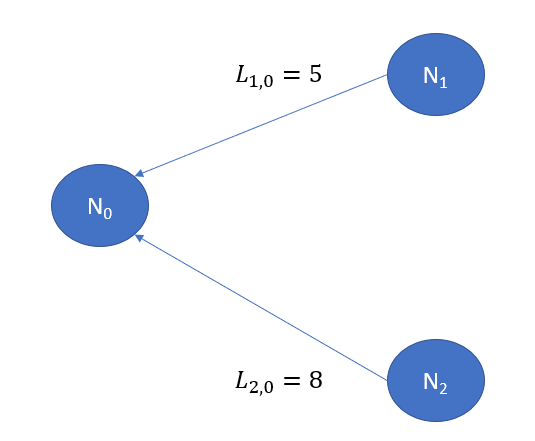

We can then describe the state in this network as:

$$S = \sum_{v \in V_N} I_{vl} \quad \forall l \in \textrm{max}(L_{N})$$

where $v$ is the vertex, $l$ is the current time for the inventory to reach its destination, $V_N$ is the set of all vertices that feed node $N$, $L_{N}$ is the set of lead times for a given node $N$.

To make this more concrete, we can imagine we have product en route for our given node. The pipelines are written as follows:

$$P_{1,0} = [6, 2, 3, 0, 90]$$

$$P_{2,0} = [0, 1, 6, 9, 12, 5, 4, 80]$$

Note that the last entry for each of these pipelines is the inventory available at the supplier node. If the node has inventory on hand of 10 units, then the state is:

$$S = [10, 6, 3, 9, 9, 102, 5, 4, 80]$$

In [7]:
p1 = np.array([6, 2, 3, 0, 90])
p2 = np.array([0, 1, 6, 9, 12, 5, 4, 80])
I0 = np.array([10])

env.pipeline_length

66

In [8]:
env.adjacency_matrix = np.vstack(env.graph.edges())
# Set node levels
env.levels = {}
env.levels['retailer'] = np.array([1])
env.levels['distributor'] = np.unique(np.hstack(
    [list(env.graph.predecessors(i)) for i in env.levels['retailer']]))
env.levels['manufacturer'] = np.unique(np.hstack(
    [list(env.graph.predecessors(i)) for i in env.levels['distributor']]))
env.levels['raw_materials'] = np.unique(np.hstack(
    [list(env.graph.predecessors(i)) for i in env.levels['manufacturer']]))

env.level_col = {'retailer': 0,
             'distributor': 1,
             'manufacturer': 2,
             'raw_materials': 3}
env.levels

{'retailer': array([1]),
 'distributor': array([2, 3]),
 'manufacturer': array([4, 5, 6]),
 'raw_materials': array([7])}

In [39]:
def _update_state_():
    return 0
env._update_state = _update_state_

In [43]:
env.D.head()

Retailer,1
Market,0
0,15.0
1,0.0
2,0.0
3,0.0
4,0.0


In [45]:
# Lead times
_ = [print(e, env.graph.edges[e]['L']) if 'L' in env.graph.edges[e] else None for e in env.graph.edges()]

(2, 1) 3
(3, 1) 6
(4, 2) 5
(4, 3) 10
(5, 3) 10
(6, 2) 8
(6, 3) 10
(7, 4) 0
(7, 5) 0
(7, 6) 0


In [89]:
pipeline_length = sum([env.graph.edges[e]['L']
                       if 'L' in env.graph.edges[e] else 1 for e in env.graph.edges()])
print(pipeline_length)
lead_times = {e: env.graph.edges[e]['L'] for e in env.graph.edges() if 'L' in env.graph.edges[e]}
lead_times

53


{(2, 1): 3,
 (3, 1): 6,
 (4, 2): 5,
 (4, 3): 10,
 (5, 3): 10,
 (6, 2): 8,
 (6, 3): 10,
 (7, 4): 0,
 (7, 5): 0,
 (7, 6): 0}

In [86]:
pipeline_length

56

In [138]:
pipeline = np.hstack([env.Y[k].iloc[env.period-(v):env.period].values
 for k, v in lead_times.items()])
node_inventory = np.hstack([env.X[n].iloc[env.period] for n in env.main_nodes])
# pipeline.shape
state = np.hstack([node_inventory, pipeline, demand])
state.shape

(59,)

In [142]:
pipeline_length = sum([env.graph.edges[e]['L']
            if 'L' in env.graph.edges[e] else 0 for e in env.graph.edges()])
pipeline_length + len(env.retail_links) + len(env.main_nodes)

59

In [125]:
node_inventory = np.hstack([env.X[n].iloc[env.period] for n in env.main_nodes])
node_inventory

array([  0., 141., 106., 226., 202., 974.])

In [129]:
env.main_nodes
env.retail_links

[(1, 0)]

In [130]:
demand = np.hstack([env.D[d].iloc[env.period] for d in env.retail_links])
demand

array([0.])

In [132]:
env.period

13

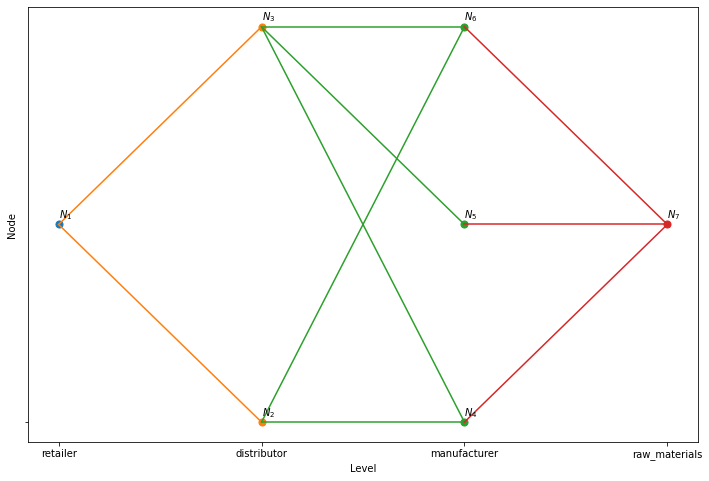

In [10]:
plot_network(env)

In [31]:
env.Y

Source      2    3    4         5    6         7          
Receiver    1    1    2    3    3    2    3    4    5    6
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
11        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
13        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
14        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
15        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
16        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
17        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
18        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
19        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
20        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
21        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
22        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
23        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
24        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
25        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
26        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
27        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
28        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
29        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
30        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [9]:
# Write wrapper for new _update_state() function
def _update_state(self):
    m = len(self.main_nodes)
    t = self.period
    state = np.zeros(self.pipeline_length)
    state[:m] = self.X.loc[t,:]
    if t == 0:
        pass
    elif t >= self.lt_max:
        state[-m*self.lt_max:] += self.action_log[t-self.lt_max:t].flatten()
    else:
        state[-m*t:] += self.action_log[:t].flatten()

    self.state = state.copy()

(30, 8)

In [33]:
{key: action[i-1] for i, key in enumerate(env.graph.edges()) if i > 0}

{(2, 1): 0.0,
 (3, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.927230954170227,
 (5, 3): 0.7759756445884705,
 (6, 4): 0.0,
 (6, 5): 0.0,
 (7, 6): 1.3788892030715942}

(array([  21.,  100.,  100.,   80.,  200.,  150., 1000.]), -613.75, False, {})

In [14]:
# env.main_nodes -> reorder links?

array([1, 2, 3, 4, 5, 6])

In [7]:
from collections import namedtuple, deque

In [8]:
Person = namedtuple('Person', 'name age score')
seq = deque()
seq.append(Person(name='nick', age=23, score=100))
seq.append(Person(name='bob', age=25, score=200))
seq.append(Person(name='charlie', age=18, score=50))

In [9]:
print(sorted(seq, key=Person.age.fget))

[Person(name='charlie', age=18, score=50), Person(name='nick', age=23, score=100), Person(name='bob', age=25, score=200)]
